# 1. Importing Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 2. Data Loading

In [2]:
train_data=pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
Final_test=pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [3]:
X = train_data.drop(columns='purchaseValue')
y = train_data['purchaseValue']

# 3. Data Information

In [4]:
train_data.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [5]:
Final_test.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


In [6]:
print("Shape of Full Data:", train_data.shape)
print("Shape of Final Test Data:", Final_test.shape)
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)

Shape of Full Data: (116023, 52)
Shape of Final Test Data: (29006, 51)
Shape of Features (X): (116023, 51)
Shape of Target (y): (116023,)


In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

In [8]:
print(Final_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

In [9]:
print("Data Types:")
print(X.dtypes.value_counts())

Data Types:
object     37
int64       9
float64     4
bool        1
Name: count, dtype: int64


In [10]:
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Total numerical columns: {len(num_cols)} → {num_cols}")
print(f"Total categorical columns: {len(cat_cols)} → {cat_cols}")

Total numerical columns: 13 → ['userId', 'gclIdPresent', 'sessionNumber', 'totals.visits', 'sessionId', 'trafficSource.adwordsClickInfo.page', 'pageViews', 'locationZone', 'totals.bounces', 'date', 'totalHits', 'sessionStart', 'new_visits']
Total categorical columns: 38 → ['trafficSource.isTrueDirect', 'browser', 'device.screenResolution', 'trafficSource.adContent', 'trafficSource.keyword', 'screenSize', 'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'trafficSource.campaign', 'device.mobileDeviceMarketingName', 'geoNetwork.networkDomain', 'device.operatingSystemVersion', 'device.flashVersion', 'geoNetwork.region', 'trafficSource', 'geoNetwork.networkLocation', 'os', 'geoNetwork.subContinent', 'trafficSource.medium', 'trafficSource.adwordsClickInfo.isVideoAd', 'browserMajor', 'locationCountry', 'device.browserSize', 'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType', 'geoNetwork.city', 'geoNetwork.met

In [11]:
print(f"Missing values in train_data: {train_data.shape}")
missing_train = train_data.isna().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print(missing_train)

print(f"\nMissing values in Final_test: {Final_test.shape}")
missing_test = Final_test.isna().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print(missing_test)

Missing values in train_data: (116023, 52)
trafficSource.adContent                         113060
trafficSource.adwordsClickInfo.slot             111742
trafficSource.adwordsClickInfo.isVideoAd        111742
trafficSource.adwordsClickInfo.adNetworkType    111742
trafficSource.adwordsClickInfo.page             111742
trafficSource.referralPath                       73309
trafficSource.isTrueDirect                       73133
trafficSource.keyword                            71861
totals.bounces                                   68875
new_visits                                       35505
pageViews                                            8
dtype: int64

Missing values in Final_test: (29006, 51)
trafficSource.adContent                         28247
trafficSource.adwordsClickInfo.adNetworkType    27899
trafficSource.adwordsClickInfo.isVideoAd        27899
trafficSource.adwordsClickInfo.page             27899
trafficSource.adwordsClickInfo.slot             27899
trafficSource.referralPath

# 4. Dummy Regressor

In [12]:
dummy_model = DummyRegressor(strategy='mean')

dummy_model.fit(X, y)

y_pred = dummy_model.predict(X)

rmse = mean_squared_error(y, y_pred, squared=False)

print("Dummy RMSE:", rmse)

Dummy RMSE: 205181642.9149616


# 5. Exploratory Data Analysis

## 5.1. Numerical fetaures

In [13]:
correlation = X[num_cols].corrwith(y)
print(correlation)

userId                                -0.003469
gclIdPresent                          -0.005652
sessionNumber                          0.230585
totals.visits                               NaN
sessionId                             -0.018537
trafficSource.adwordsClickInfo.page   -0.025839
pageViews                              0.248454
locationZone                                NaN
totals.bounces                              NaN
date                                  -0.010338
totalHits                              0.251651
sessionStart                          -0.018537
new_visits                                  NaN
dtype: float64


In [14]:
temp_df=train_data.copy()
temp_df['Purchased']=temp_df['purchaseValue'] > 0
temp_df['Purchased'].value_counts()

Purchased
False    92038
True     23985
Name: count, dtype: int64

### 5.1.1. PageVeiws

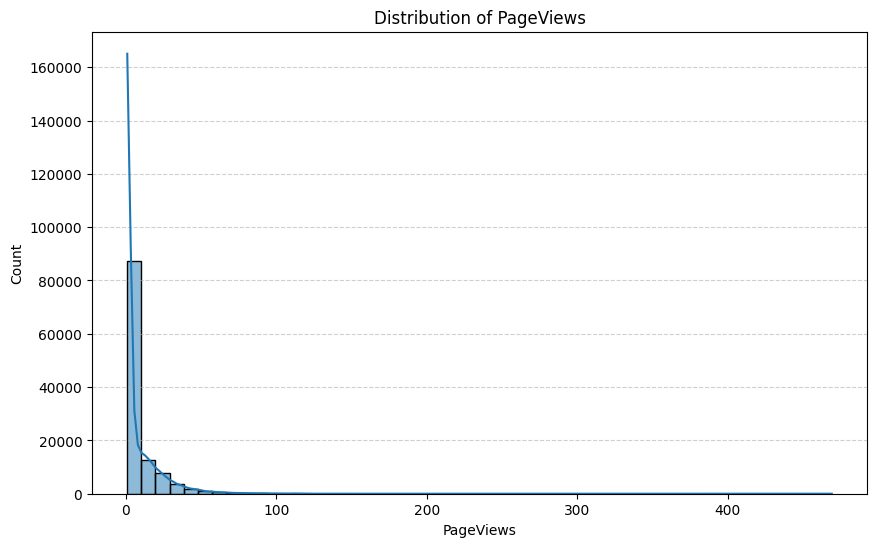

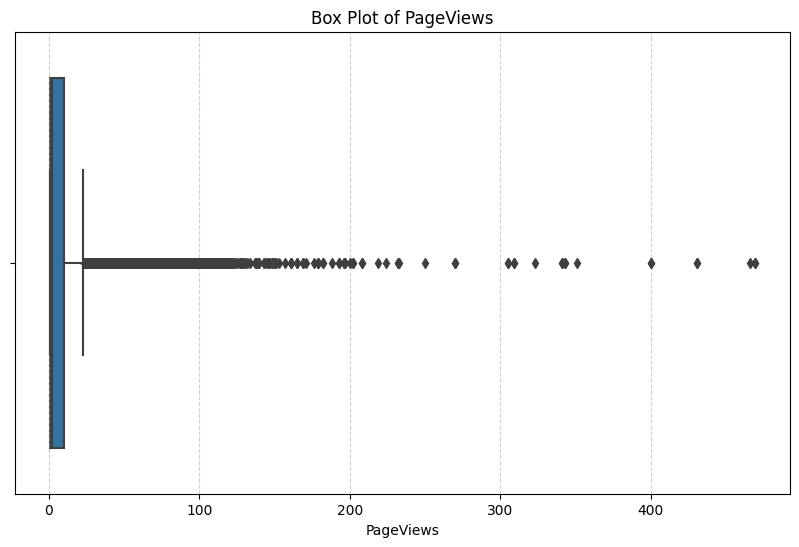

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(temp_df['pageViews'], bins=50, kde=True)
plt.title("Distribution of PageViews")
plt.xlabel("PageViews")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_df['pageViews'])
plt.title("Box Plot of PageViews")
plt.xlabel("PageViews")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

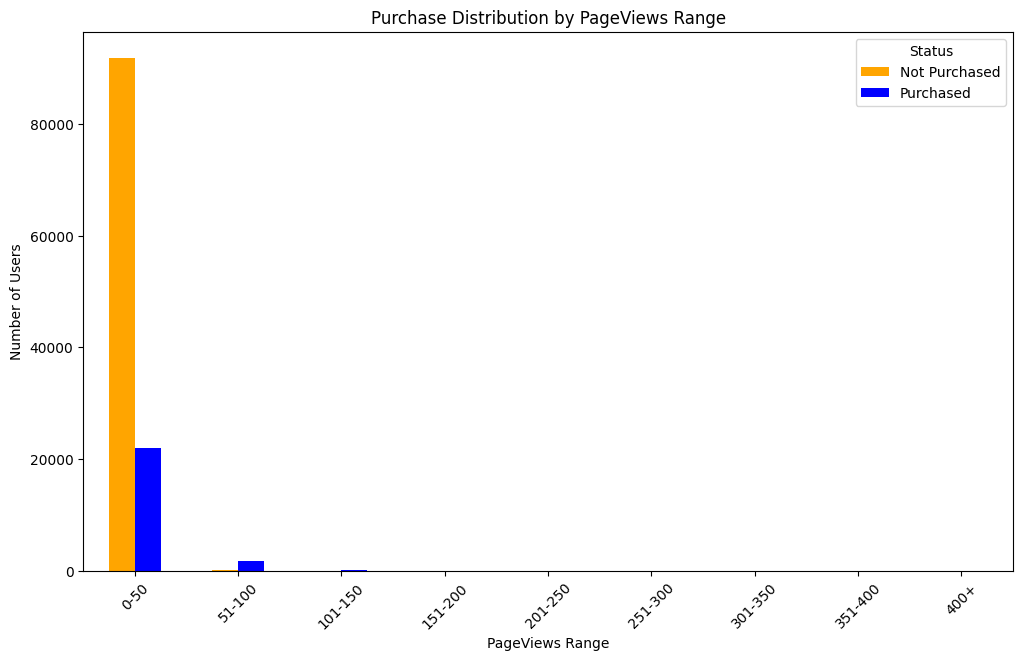

Purchased         False  True 
pageViews_binned              
0-50              91876  21946
51-100              141   1809
101-150               8    181
151-200               3     22
201-250               2      8
251-300               0      2
301-350               0      9
351-400               0      3
400+                  0      5


In [16]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400,1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+']
temp_df['pageViews_binned'] = pd.cut(temp_df['pageViews'], bins=bins, labels=labels, right=True)

counts = temp_df.groupby(['pageViews_binned', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])
plt.title('Purchase Distribution by PageViews Range')
plt.xlabel('PageViews Range')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'], title='Status')
plt.show()
print(counts)

In [17]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

pageViews_binned
0-50        19.280983
51-100      92.769231
101-150     95.767196
151-200     88.000000
201-250     80.000000
251-300    100.000000
301-350    100.000000
351-400    100.000000
400+       100.000000
dtype: float64


### 5.1.2. sessionNumber

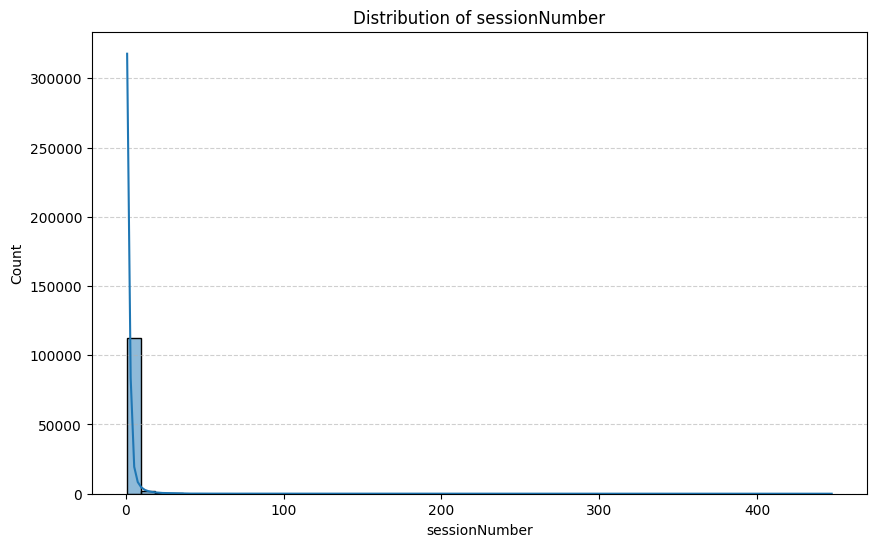

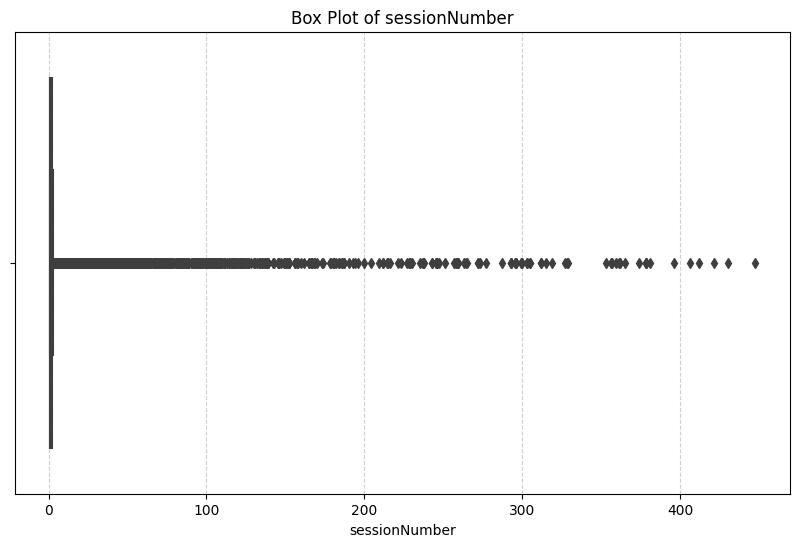

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(temp_df['sessionNumber'], bins=50, kde=True)
plt.title("Distribution of sessionNumber")
plt.xlabel("sessionNumber")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_df['sessionNumber'])
plt.title("Box Plot of sessionNumber")
plt.xlabel("sessionNumber")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

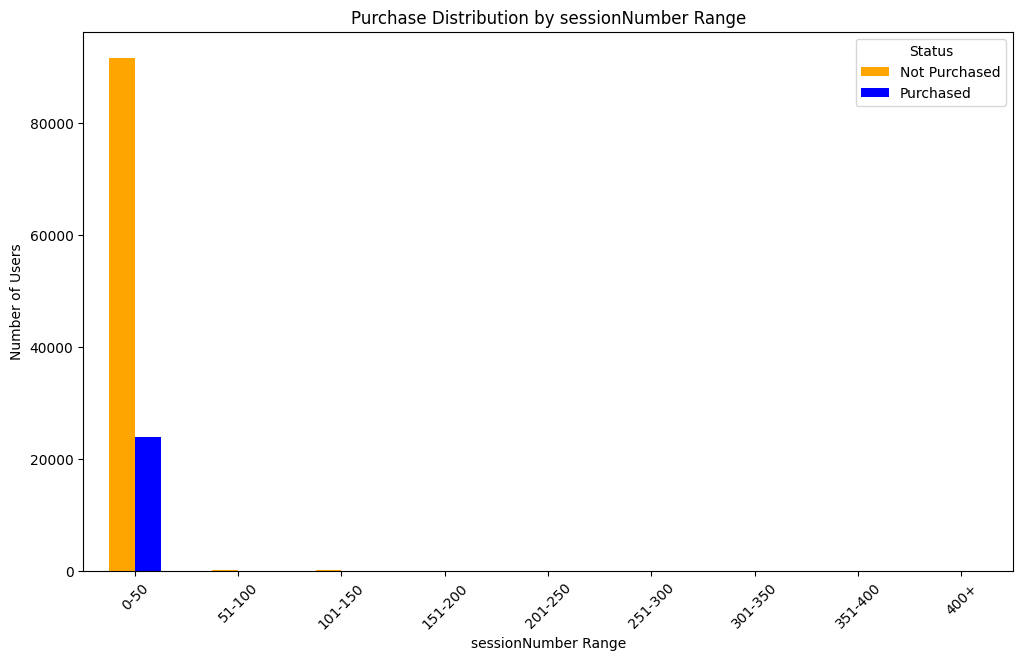

Purchased             False  True 
sessionNumber_binned              
0-50                  91643  23843
51-100                  210     74
101-150                 100     33
151-200                  38      3
201-250                  18      8
251-300                  14     10
301-350                   3      8
351-400                   8      5
400+                      4      1


In [19]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400,1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+']
temp_df['sessionNumber_binned'] = pd.cut(temp_df['sessionNumber'], bins=bins, labels=labels, right=True)

counts = temp_df.groupby(['sessionNumber_binned', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])
plt.title('Purchase Distribution by sessionNumber Range')
plt.xlabel('sessionNumber Range')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'], title='Status')
plt.show()
print(counts)

In [20]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

sessionNumber_binned
0-50       20.645793
51-100     26.056338
101-150    24.812030
151-200     7.317073
201-250    30.769231
251-300    41.666667
301-350    72.727273
351-400    38.461538
400+       20.000000
dtype: float64


### 5.1.3. totalHits

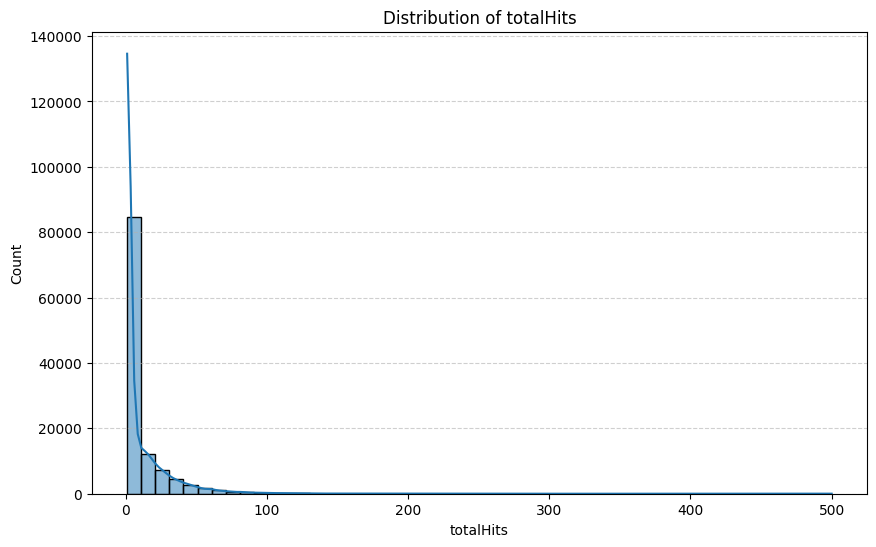

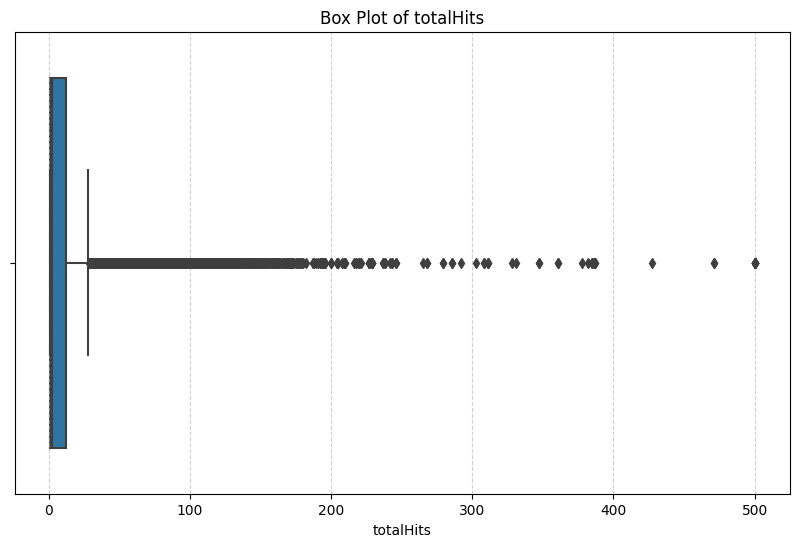

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(temp_df['totalHits'], bins=50, kde=True)
plt.title("Distribution of totalHits")
plt.xlabel("totalHits")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=temp_df['totalHits'])
plt.title("Box Plot of totalHits")
plt.xlabel("totalHits")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

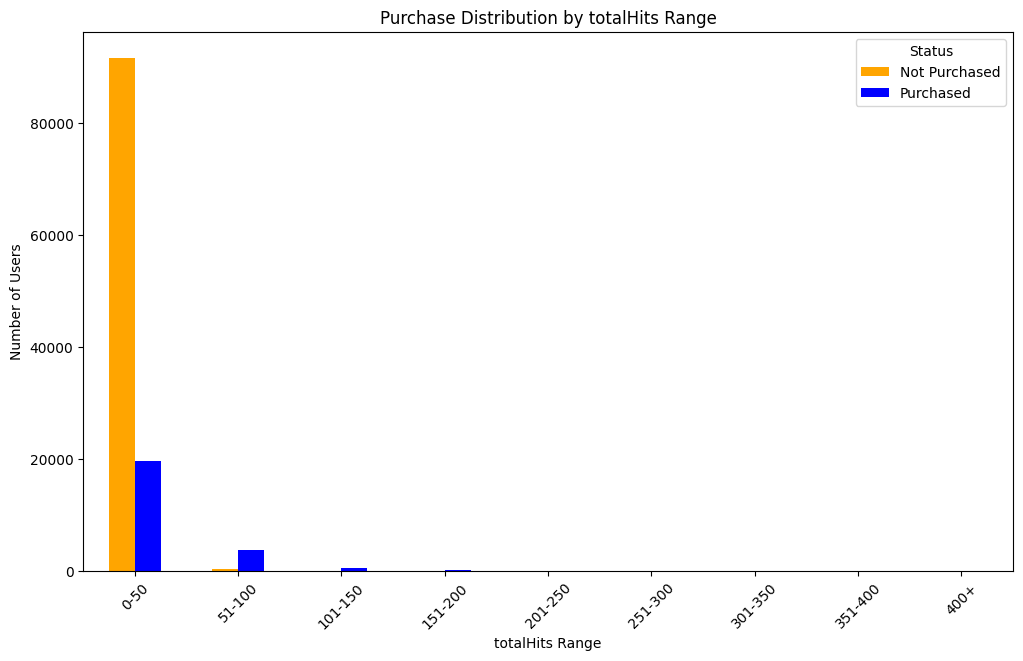

Purchased         False  True 
totalHits_binned              
0-50              91614  19595
51-100              355   3684
101-150              57    517
151-200               6    119
201-250               1     34
251-300               0      8
301-350               2      8
351-400               1     10
400+                  2     10


In [22]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400,1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+']
temp_df['totalHits_binned'] = pd.cut(temp_df['totalHits'], bins=bins, labels=labels, right=True)

counts = temp_df.groupby(['totalHits_binned', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])
plt.title('Purchase Distribution by totalHits Range')
plt.xlabel('totalHits Range')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'], title='Status')
plt.show()
print(counts)

In [23]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

totalHits_binned
0-50        17.619977
51-100      91.210696
101-150     90.069686
151-200     95.200000
201-250     97.142857
251-300    100.000000
301-350     80.000000
351-400     90.909091
400+        83.333333
dtype: float64


### 5.1.4. Users v/s PurchaseValue

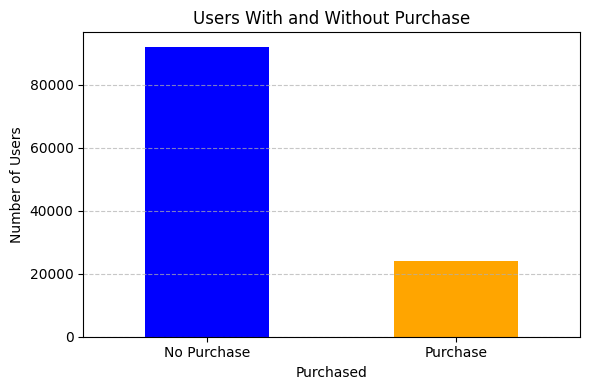

Number of user purchased=23985
Number of user not purchased=92038


In [24]:
purchase_counts = temp_df['Purchased'].value_counts()

plt.figure(figsize=(6, 4))
purchase_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks([False, True], ['No Purchase', 'Purchase'], rotation=0)
plt.ylabel("Number of Users")
plt.title("Users With and Without Purchase")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Number of user purchased={purchase_counts[1]}")
print(f"Number of user not purchased={purchase_counts[0]}")

## 5.2. Categorical Features

### 5.2.1. Browser

In [25]:
temp_df['browser'].value_counts()

browser
Chrome                                                  84508
Safari                                                  19184
Firefox                                                  4031
Internet Explorer                                        2155
Android Webview                                          1472
Edge                                                     1216
Safari (in-app)                                           793
Opera Mini                                                733
Samsung Internet                                          563
Opera                                                     548
UC Browser                                                296
YaBrowser                                                 187
Amazon Silk                                                73
Coc Coc                                                    61
Android Browser                                            59
Mozilla Compatible Agent                                   36


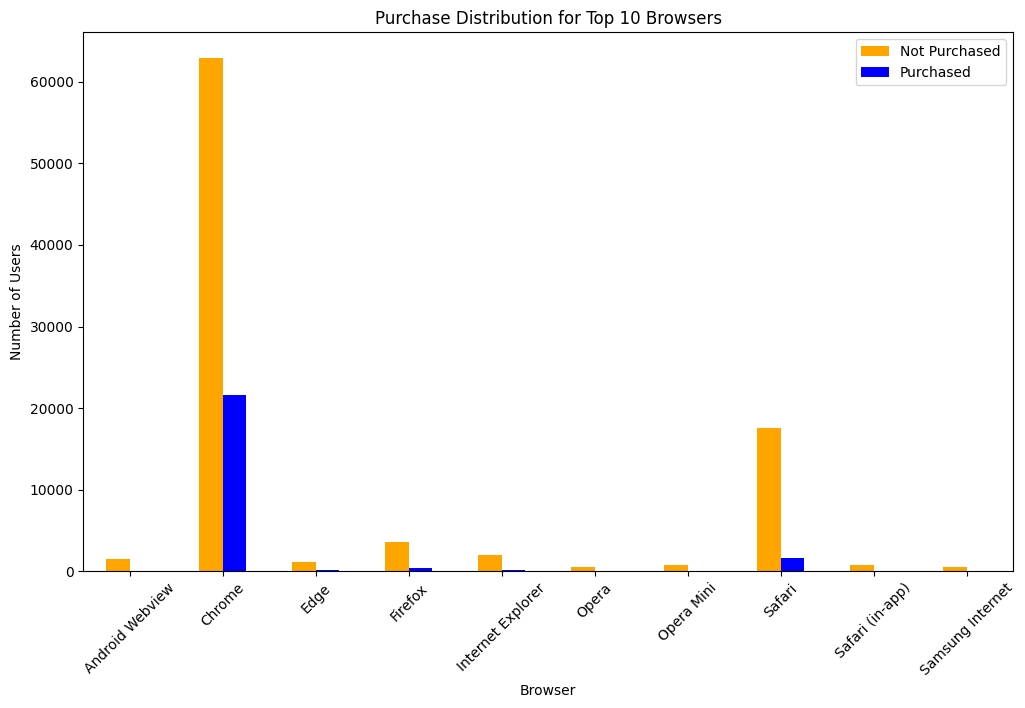

Purchased          False  True 
browser                        
Android Webview     1463      9
Chrome             62913  21595
Edge                1103    113
Firefox             3594    437
Internet Explorer   1942    213
Opera                532     16
Opera Mini           733      0
Safari             17609   1575
Safari (in-app)      771     22
Samsung Internet     558      5


In [26]:
top_10_browsers = temp_df['browser'].value_counts().nlargest(10).index

df_top10 = temp_df[temp_df['browser'].isin(top_10_browsers)]

df_top10['Purchased'] = df_top10['purchaseValue'] > 0

counts = df_top10.groupby(['browser', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(12, 7), color=['orange', 'blue'])
plt.title('Purchase Distribution for Top 10 Browsers')
plt.xlabel('Browser')
plt.ylabel('Number of Users')
plt.xticks(rotation=45) 
plt.legend(['Not Purchased', 'Purchased'])
plt.show()
print(counts)

In [27]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

browser
Android Webview       0.611413
Chrome               25.553794
Edge                  9.292763
Firefox              10.840982
Internet Explorer     9.883991
Opera                 2.919708
Opera Mini            0.000000
Safari                8.209967
Safari (in-app)       2.774275
Samsung Internet      0.888099
dtype: float64


### 5.2.2. geoCluster (Region)

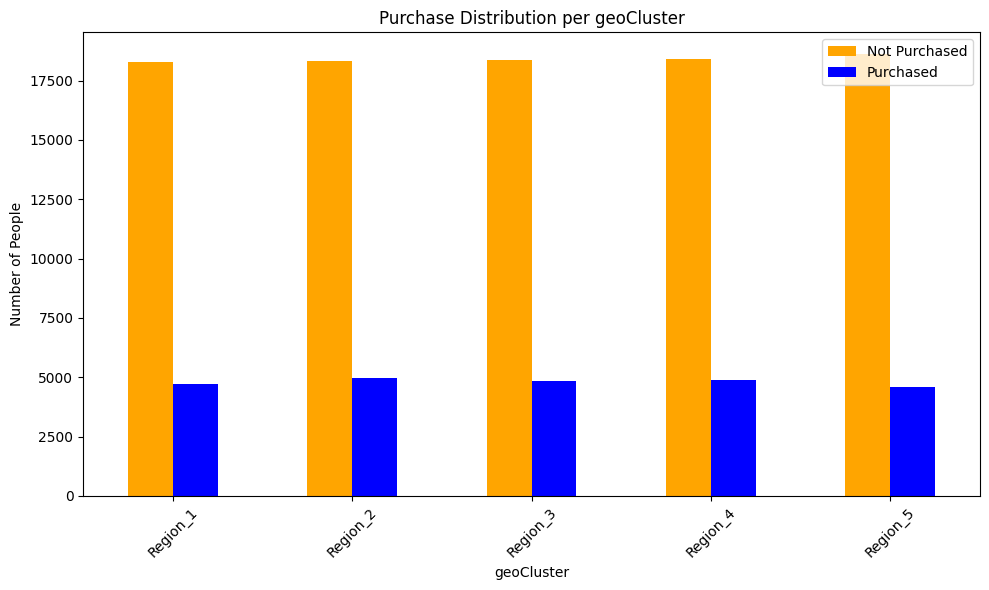

Purchased   False  True 
geoCluster              
Region_1    18297   4722
Region_2    18345   4949
Region_3    18386   4835
Region_4    18406   4872
Region_5    18604   4607


In [28]:
counts = temp_df.groupby(['geoCluster', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Purchase Distribution per geoCluster')
plt.xlabel('geoCluster')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'])
plt.tight_layout()
plt.show()
print(counts)

In [29]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

geoCluster
Region_1    20.513489
Region_2    21.245814
Region_3    20.821670
Region_4    20.929633
Region_5    19.848348
dtype: float64


### 5.2.3. geoNetwork.continent (Continent)

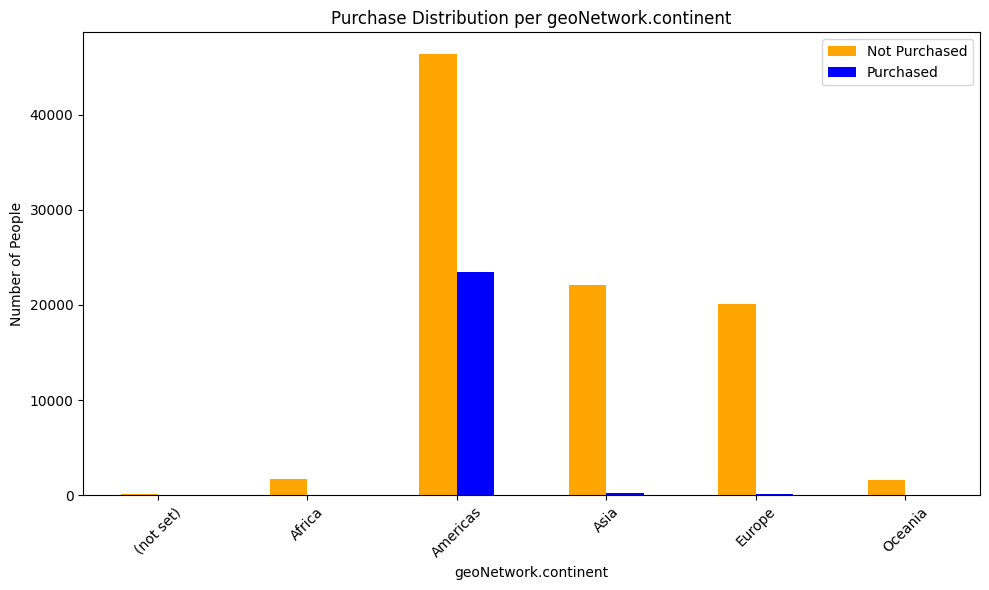

Purchased             False  True 
geoNetwork.continent              
(not set)               127      9
Africa                 1733     14
Americas              46345  23511
Asia                  22127    257
Europe                20130    164
Oceania                1576     30


In [30]:
counts = temp_df.groupby(['geoNetwork.continent', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Purchase Distribution per geoNetwork.continent')
plt.xlabel('geoNetwork.continent')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'])
plt.tight_layout()
plt.show()
print(counts)

In [31]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

geoNetwork.continent
(not set)     6.617647
Africa        0.801374
Americas     33.656379
Asia          1.148142
Europe        0.808121
Oceania       1.867995
dtype: float64


### 5.2.4. geoNetwork.networkDomain

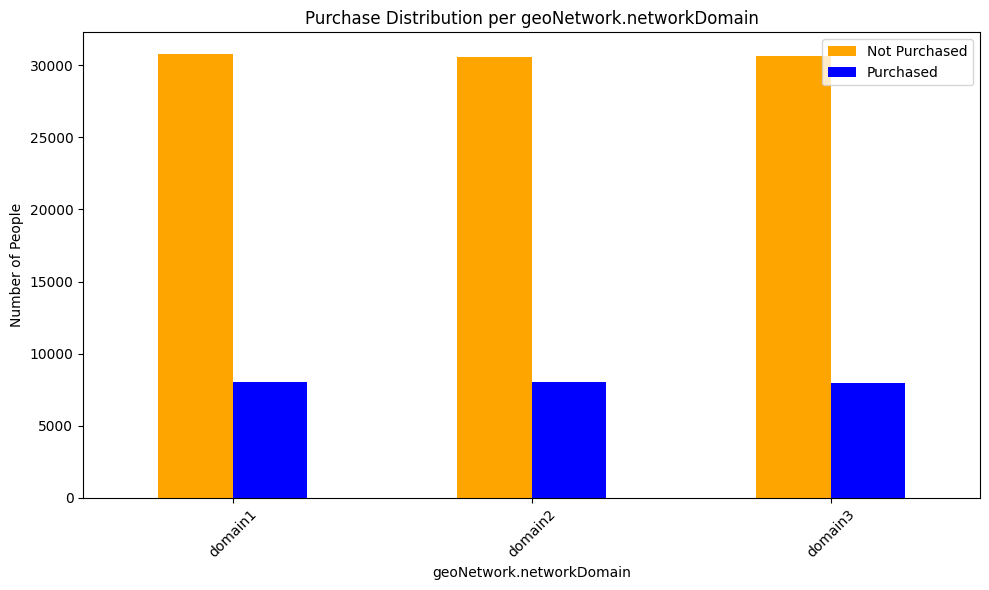

Purchased                 False  True 
geoNetwork.networkDomain              
domain1                   30754   8041
domain2                   30604   8015
domain3                   30680   7929


In [32]:
counts = temp_df.groupby(['geoNetwork.networkDomain', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Purchase Distribution per geoNetwork.networkDomain')
plt.xlabel('geoNetwork.networkDomain')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'])
plt.tight_layout()
plt.show()
print(counts)

In [33]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

geoNetwork.networkDomain
domain1    20.726898
domain2    20.754033
domain3    20.536662
dtype: float64


### 5.2.5. userChannel

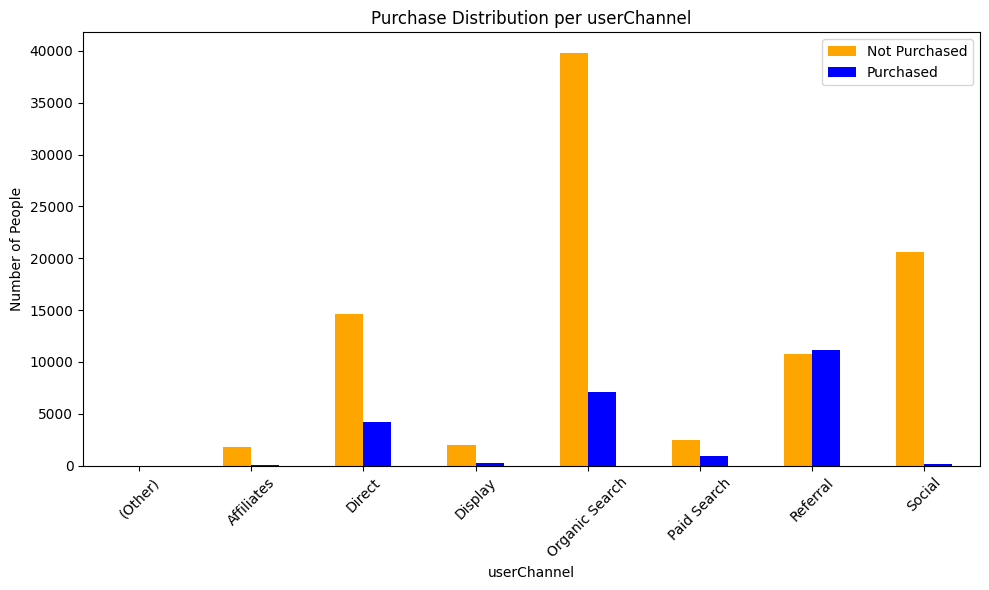

Purchased       False  True 
userChannel                 
(Other)             8      2
Affiliates       1757     20
Direct          14635   4251
Display          2028    273
Organic Search  39798   7127
Paid Search      2443    963
Referral        10790  11142
Social          20579    207


In [34]:
counts = temp_df.groupby(['userChannel', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Purchase Distribution per userChannel')
plt.xlabel('userChannel')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'])
plt.tight_layout()
plt.show()
print(counts)

In [35]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

userChannel
(Other)           20.000000
Affiliates         1.125492
Direct            22.508737
Display           11.864407
Organic Search    15.188066
Paid Search       28.273635
Referral          50.802480
Social             0.995863
dtype: float64


### 5.2.6. deviceType

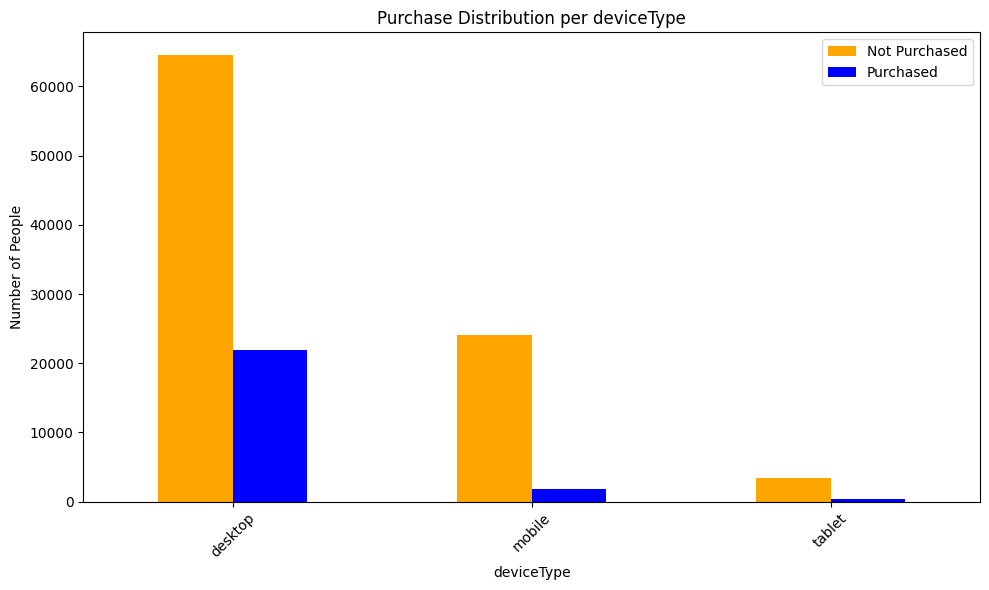

Purchased   False  True 
deviceType              
desktop     64596  21884
mobile      24080   1770
tablet       3362    331


In [36]:
counts = temp_df.groupby(['deviceType', 'Purchased']).size().unstack(fill_value=0)

counts.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Purchase Distribution per deviceType')
plt.xlabel('deviceType')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(['Not Purchased', 'Purchased'])
plt.tight_layout()
plt.show()
print(counts)

In [37]:
print("Percentage wise\n")
print(counts[True]/(counts[True]+counts[False])*100)

Percentage wise

deviceType
desktop    25.305273
mobile      6.847195
tablet      8.962903
dtype: float64


# 6. Data Preprocessing

In [38]:
X_train_num=X[num_cols]
X_train_num.shape

(116023, 13)

In [39]:
X_train_num.isna().sum()

userId                                      0
gclIdPresent                                0
sessionNumber                               0
totals.visits                               0
sessionId                                   0
trafficSource.adwordsClickInfo.page    111742
pageViews                                   8
locationZone                                0
totals.bounces                          68875
date                                        0
totalHits                                   0
sessionStart                                0
new_visits                              35505
dtype: int64

In [40]:
X_train_num =X_train_num.drop(columns=['trafficSource.adwordsClickInfo.page'])
X_train_num.shape

(116023, 12)

In [41]:
zero_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

pageviews_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('pageviews_impute', pageviews_imputer, ['pageViews']),
        ('zero_impute', zero_imputer, ['totals.bounces', 'new_visits'])
    ],
    remainder='passthrough'
).set_output(transform="pandas")

X_train_processed = preprocessor.fit_transform(X_train_num)
X_train_processed

,pageviews_impute__pageViews,zero_impute__totals.bounces,zero_impute__new_visits,remainder__userId,remainder__gclIdPresent,remainder__sessionNumber,remainder__totals.visits,remainder__sessionId,remainder__locationZone,remainder__date,remainder__totalHits,remainder__sessionStart
0,1.0,1.0,1.0,61421,0,1,1,1500100799,8,20170714,1,1500100799
1,1.0,1.0,1.0,72287,0,1,1,1495262065,8,20170519,1,1495262065
2,6.0,0.0,0.0,25180,0,2,1,1508510328,8,20171020,6,1508510328
3,1.0,1.0,1.0,41295,0,1,1,1483431838,8,20170103,1,1483431838
4,54.0,0.0,1.0,113697,0,1,1,1475804633,8,20161006,66,1475804633
...,...,...,...,...,...,...,...,...,...,...,...,...
116018,26.0,0.0,1.0,109014,0,1,1,1500318402,8,20170717,28,1500318402
116019,1.0,1.0,1.0,66111,0,1,1,1478624150,8,20161108,1,1478624150
116020,1.0,1.0,0.0,97614,0,2,1,1470384216,8,20160805,1,1470384216
116021,2.0,0.0,1.0,71050,0,1,1,1506953297,8,20171002,2,1506953297


In [42]:
X_train_processed.columns = [col.split("__")[-1] for col in X_train_processed.columns]
X_train_processed

,pageViews,totals.bounces,new_visits,userId,gclIdPresent,sessionNumber,totals.visits,sessionId,locationZone,date,totalHits,sessionStart
0,1.0,1.0,1.0,61421,0,1,1,1500100799,8,20170714,1,1500100799
1,1.0,1.0,1.0,72287,0,1,1,1495262065,8,20170519,1,1495262065
2,6.0,0.0,0.0,25180,0,2,1,1508510328,8,20171020,6,1508510328
3,1.0,1.0,1.0,41295,0,1,1,1483431838,8,20170103,1,1483431838
4,54.0,0.0,1.0,113697,0,1,1,1475804633,8,20161006,66,1475804633
...,...,...,...,...,...,...,...,...,...,...,...,...
116018,26.0,0.0,1.0,109014,0,1,1,1500318402,8,20170717,28,1500318402
116019,1.0,1.0,1.0,66111,0,1,1,1478624150,8,20161108,1,1478624150
116020,1.0,1.0,0.0,97614,0,2,1,1470384216,8,20160805,1,1470384216
116021,2.0,0.0,1.0,71050,0,1,1,1506953297,8,20171002,2,1506953297


In [43]:
X_train_processed.isna().sum()

pageViews         0
totals.bounces    0
new_visits        0
userId            0
gclIdPresent      0
sessionNumber     0
totals.visits     0
sessionId         0
locationZone      0
date              0
totalHits         0
sessionStart      0
dtype: int64

In [44]:
Final_test_test = Final_test[X_train_processed.columns]
print(Final_test_test.shape)

Final_test_processed=preprocessor.transform(Final_test_test)
Final_test_processed.columns = [col.split("__")[-1] for col in Final_test_processed.columns]
print(Final_test_processed.head())


(29006, 12)
   pageViews  totals.bounces  new_visits  userId  gclIdPresent  sessionNumber  \
0       10.0             0.0         0.0   59555             0              2   
1        9.0             0.0         1.0    6394             0              1   
2        2.0             0.0         1.0   38969             0              1   
3        3.0             0.0         0.0  120027             0             30   
4        7.0             0.0         1.0   69453             0              1   

   totals.visits   sessionId  locationZone      date  totalHits  sessionStart  
0              1  1494262567             8  20170508         11    1494262567  
1              1  1491433811             8  20170405          9    1491433811  
2              1  1489001815             8  20170308          2    1489001815  
3              1  1510593024             8  20171113          3    1510593024  
4              1  1481559809             8  20161212          7    1481559809  


In [45]:
Final_test_processed.isna().sum()

pageViews         0
totals.bounces    0
new_visits        0
userId            0
gclIdPresent      0
sessionNumber     0
totals.visits     0
sessionId         0
locationZone      0
date              0
totalHits         0
sessionStart      0
dtype: int64

# 7. Feature Engineering

In [46]:
def create_date_features(df):
    df_copy = df.copy()
    df_copy['date'] = pd.to_datetime(df_copy['date'], format='%Y%m%d')

    df_copy['dayofweek'] = df_copy['date'].dt.dayofweek
    df_copy['month'] = df_copy['date'].dt.month
    df_copy['day'] = df_copy['date'].dt.day
    df_copy['year'] = df_copy['date'].dt.year
    df_copy['is_weekend'] = df_copy['dayofweek'].isin([5, 6]).astype(int)

    df_copy = df_copy.drop(columns=['date'])
    return df_copy

X_engineered = create_date_features(X_train_processed)
X_final_test_engineered = create_date_features(Final_test_processed)

In [47]:
print(X_engineered.head(),X_engineered.shape)
print(X_final_test_engineered.head(),X_final_test_engineered.shape)

   pageViews  totals.bounces  new_visits  userId  gclIdPresent  sessionNumber  \
0        1.0             1.0         1.0   61421             0              1   
1        1.0             1.0         1.0   72287             0              1   
2        6.0             0.0         0.0   25180             0              2   
3        1.0             1.0         1.0   41295             0              1   
4       54.0             0.0         1.0  113697             0              1   

   totals.visits   sessionId  locationZone  totalHits  sessionStart  \
0              1  1500100799             8          1    1500100799   
1              1  1495262065             8          1    1495262065   
2              1  1508510328             8          6    1508510328   
3              1  1483431838             8          1    1483431838   
4              1  1475804633             8         66    1475804633   

   dayofweek  month  day  year  is_weekend  
0          4      7   14  2017           

# 8. Dataset Splitting

In [48]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val_test:", X_val_test.shape)
print("Shape of y_val_test:", y_val_test.shape)

Shape of X_train: (92818, 16)
Shape of y_train: (92818,)
Shape of X_val_test: (23205, 16)
Shape of y_val_test: (23205,)


# 9. Models

## 9.1. Linear Regression

In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_val_test)
print("Prediction shape:", lr_pred.shape)

print("R² Score:", r2_score(y_val_test, lr_pred))
print("MAE:", mean_absolute_error(y_val_test, lr_pred))
print("RMSE:", mean_squared_error(y_val_test, lr_pred, squared=False))

Prediction shape: (23205,)
R² Score: 0.12641567805688414
MAE: 36341883.399021946
RMSE: 203206888.0446483


## 9.2. Random Forest

In [50]:
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [7, 10],
    'min_samples_split': [2, 5],           
    'min_samples_leaf': [1, 2],             
    'max_features': ['sqrt', 'log2']            
}

rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# rf_grid.fit(X_train, y_train)

# best_rf = rf_grid.best_estimator_
# rf_pred = best_rf.predict(X_val_test)

# print("Best Parameters:", rf_grid.best_params_)
# print("R2 Score:", r2_score(y_val_test, rf_pred))
# print("MAE:", mean_absolute_error(y_val_test, rf_pred))
# print("RMSE:", mean_squared_error(y_val_test, rf_pred, squared=False))

In [51]:
summary="""Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: 
{
    'max_depth': 10, 
    'max_features': 'sqrt', 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 200
}

R2 Score: 0.19156035824440332
MAE: 27929239.41620483
RMSE: 195483366.6309826"""
print(summary)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: 
{
    'max_depth': 10, 
    'max_features': 'sqrt', 
    'min_samples_leaf': 1, 
    'min_samples_split': 2, 
    'n_estimators': 200
}

R2 Score: 0.19156035824440332
MAE: 27929239.41620483
RMSE: 195483366.6309826


## 9.3. Gradient Boost

In [52]:
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_

# predictions = best_model.predict(X_val_test)

# print("Best Parameters:", grid_search.best_params_)
# print("R2 Score:", r2_score(y_val_test, predictions))
# print("MAE:", mean_absolute_error(y_val_test, predictions))
# print("RMSE:", mean_squared_error(y_val_test, predictions, squared=False))

In [53]:
summary="""Fitting 3 folds for each of 64 candidates, totalling 192 fits

Best Parameters: 
{
    'learning_rate': 0.05, 
    'max_depth': 3, 
    'min_samples_leaf': 1, 
    'min_samples_split': 5, 
    'n_estimators': 100, 
    'subsample': 1.0
}

R2 Score: -0.10330224658835263
MAE: 30228808.63066102
RMSE: 228366954.74748847"""
print(summary)

Fitting 3 folds for each of 64 candidates, totalling 192 fits

Best Parameters: 
{
    'learning_rate': 0.05, 
    'max_depth': 3, 
    'min_samples_leaf': 1, 
    'min_samples_split': 5, 
    'n_estimators': 100, 
    'subsample': 1.0
}

R2 Score: -0.10330224658835263
MAE: 30228808.63066102
RMSE: 228366954.74748847


# 10. Xgboost

In [54]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.5, 1, 1.5, 2],
    'reg_lambda': [0, 0.5, 1, 1.5, 2]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# xgb_random.fit(X_train_final, y)
# best_xgb_model = xgb_random.best_estimator_

# print("Best Model:", xgb_random.best_params_)

In [55]:
summary="""Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Model: 
{
    'subsample': 0.8, 
    'reg_lambda': 2, 
    'reg_alpha': 1, 
    'n_estimators': 400, 
    'max_depth': 9, 
    'learning_rate': 0.2, 
    'colsample_bytree': 0.8
}"""
print(summary)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Model: 
{
    'subsample': 0.8, 
    'reg_lambda': 2, 
    'reg_alpha': 1, 
    'n_estimators': 400, 
    'max_depth': 9, 
    'learning_rate': 0.2, 
    'colsample_bytree': 0.8
}


In [56]:
best_xgb_model = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.8,
    reg_lambda=2,
    reg_alpha=1,            
    n_estimators=400,
    max_depth=9,           
    learning_rate=0.2,
    colsample_bytree=0.8,
    random_state=42
)
best_xgb_model.fit(X_engineered, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# 11. Final Prediction & Submission

In [57]:
y_pred=best_xgb_model.predict(X_final_test_engineered)
print(y_pred.shape)

submission = pd.DataFrame({"id": range(0,Final_test.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)

(29006,)
